# Assignment 1 : EDA

## Task 1: Exploratory Data Analysis

### Importing Libraries:

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### Importing Data:

In [22]:
df = pd.read_csv("vehicles.csv")

/var/folders/r4/9ncp61z543v94_5sltg11_bm0000gn/T/ipykernel_7041/1559163291.py:1: DtypeWarning: Columns (73,74,76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("vehicles.csv")


### Data Exploration:

In [23]:
# Getting the number of rows and columns
df.shape

(40081, 83)

In [24]:
# Exploring the top 5 rows
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [25]:
# Understand the types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40081 entries, 0 to 40080
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        40081 non-null  float64
 1   barrelsA08       40081 non-null  float64
 2   charge120        40081 non-null  float64
 3   charge240        40081 non-null  float64
 4   city08           40081 non-null  int64  
 5   city08U          40081 non-null  float64
 6   cityA08          40081 non-null  int64  
 7   cityA08U         40081 non-null  float64
 8   cityCD           40081 non-null  float64
 9   cityE            40081 non-null  float64
 10  cityUF           40081 non-null  float64
 11  co2              40081 non-null  int64  
 12  co2A             40081 non-null  int64  
 13  co2TailpipeAGpm  40081 non-null  float64
 14  co2TailpipeGpm   40081 non-null  float64
 15  comb08           40081 non-null  int64  
 16  comb08U          40081 non-null  float64
 17  combA08     

In [122]:
class DataFrameStats:
    def __init__(self, df: pd.DataFrame):
        """
        initialize new pandas DF
        """
        self.df = df
        
    def show_date_range(self):
        """
        Get the start and end dates of the dataset
        """
        
        # filter for bad cols
        if 'year' not in self.df.columns:
            raise ValueError("The DataFrame must contain a 'year' column.")
        
        # check if the 'year' column has non-null values
        if self.df['year'].dropna().empty:
            raise ValueError("The 'year' column does not contain any valid entries.")
        
        # get the earliest and latest years
        earliest_year = int(self.df['year'].min())
        latest_year = int(self.df['year'].max())
        
        # print results
        print(f"The earliest year in the dataset is: {earliest_year}")
        print(f"The latest year in the dataset is: {latest_year}")
        
        return earliest_year, latest_year

    def get_min(self):
        """
        Return min value
        """
        return self.df.min()

    def get_max(self):
        """
        return max vaule
        """
        return self.df.max()

    def get_q1(self):
        """
        return Q1
        """
        return self.df.quantile(0.25)

    def get_median(self):
        """
        return median
        """
        return self.df.median()

    def get_mean(self):
        """
        Return mean
        """
        return self.df.mean()

    def get_q3(self):
        """
        returns Q3
        """
        return self.df.quantile(0.75)

    def get_numeric_summary(self):
        """
        Get the full summary of numeric data
        """
        numeric_df = self.df.select_dtypes(include=['number'])
        summary = pd.DataFrame({
            'Min': numeric_df.min(),
            'Q1': numeric_df.quantile(0.25),
            'Median': numeric_df.median(),
            'Mean': numeric_df.mean(),
            'Q3': numeric_df.quantile(0.75),
            'Max': numeric_df.max()
        })
        return summary
    
    def get_non_numeric_summary(self):
        """
        Get the full summary of non-numeric data
        """
        non_numeric_df = self.df.select_dtypes(exclude=['number'])
        non_numeric_summary = {}
        for col in non_numeric_df.columns:
            non_numeric_summary[col] = {
                'Unique Values': non_numeric_df[col].nunique(),
                'Most Frequent': non_numeric_df[col].mode().values[0] if not non_numeric_df[col].mode().empty else None,
                'Frequency': non_numeric_df[col].value_counts().to_dict()
            }
        return non_numeric_summary
    
    def get_summary(self):
        """
        Get the full summary for both
        """
        numeric_summary = self.get_numeric_summary()
        non_numeric_summary = self.get_non_numeric_summary()
        return numeric_summary, non_numeric_summary
    
    def plot_summary(self):
        """
        Plot heatmap of summary statistics, but only for numerical columns.
        """
        # get the summary
        summary_df = self.get_numeric_summary()
        
        # create the heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(summary_df, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Value'})
        
        # add title and labels
        plt.title('Summary Statistics (Min, Q1, Median, Mean, Q3, Max)', fontsize=14, fontweight='bold')
        plt.xlabel('Features', fontsize=12)
        plt.ylabel('Statistics', fontsize=12)
        plt.xticks(rotation=90)
    
        # show plot
        plt.show()

        
    def plot_countplot(self, col: str):
        """
        Plot a count plot for a non-numerical column
        """
        
        # filter bad cols
        if col not in self.df.columns:
            raise ValueError(f"Column '{col}' does not exist in the DataFrame.")
        
        # Filter for non-numeric
        non_numeric_df = self.df.select_dtypes(exclude=['number'])
        if col not in non_numeric_df.columns:
            raise ValueError(f"Column '{col}' is not a non-numerical feature.")
        
        # create plot
        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.df, x=col, palette='viridis')

        # Add labels and title
        plt.title(f'Count Plot of {col}', fontsize=14, fontweight='bold')
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        
        # show plot
        plt.show()
        
    def plot_boxplot_with_swarm(self, x_col: str, y_col: str):
        """
        Plot a boxplot with swarm plot
        """
        
        # Logic to handle col name issues
        if x_col not in self.df.columns or y_col not in self.df.columns:
            raise ValueError(f"Either {x_col} or {y_col} does not exist in the DataFrame.")

        # Set style
        plt.style.use('ggplot')

        # Create the fig
        plt.figure(figsize=(10, 6))
        
        # Add boxplot
        sns.boxplot(x=x_col, y=y_col, data=self.df, color='white', fliersize=2, boxprops=dict(facecolor='None'))

        # Add swarmplot
        sns.swarmplot(x=x_col, y=y_col, data=self.df, color='black', size=2, alpha=0.7)

        # Add labels
        plt.title(f'{y_col} vs {x_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.xticks(rotation=90)

        # Show plot
        plt.show()
        
    def plot_scatter_with_boxplot_aggregated(self, x_col: str, y_col: str, agg_func='median'):
        """
        Plot a boxplot with swarm plot, but aggregated to reproduce other fig
        """
        
        # Filter bad cols
        if x_col not in self.df.columns or y_col not in self.df.columns:
            raise ValueError(f"Either {x_col} or {y_col} does not exist in the DataFrame.")
    
        # Group the data by col1 (year) and aggregate the values 
        aggregated_df = self.df.groupby(x_col)[y_col].agg(agg_func).reset_index()
    
        # Create fig
        plt.style.use('ggplot')
        plt.figure(figsize=(10, 6))

        # Add scatter plot
        sns.scatterplot(x=x_col, y=y_col, data=aggregated_df, color='black', s=50)
    
        # Add boxplot
        sns.boxplot(x=x_col, y=y_col, data=self.df, color='white', fliersize=2, boxprops=dict(facecolor='None'))
    
        # Add labels
        plt.title(f'{y_col} vs {x_col} (Aggregated by {agg_func})')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.xticks(rotation=90)
    
        # show plot
        plt.show()

    def plot_histogram(self, column: str, bins: int = 30):
        """
        Plot a histogram for a specific numerical column.
        """
        if column not in self.df.columns:
            raise ValueError(f"Column '{column}' does not exist in the DataFrame.")
        
        numeric_df = self.df.select_dtypes(include=['number'])
        if column not in numeric_df.columns:
            raise ValueError(f"Column '{column}' must be numeric.")
        
        # Create the histogram
        plt.style.use('ggplot')
        plt.figure(figsize=(10, 6))
        plt.hist(self.df[column], bins=bins, edgecolor='black')

        # Add titles and labels
        plt.title(f'Histogram of {column}', fontsize=14, fontweight='bold')
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)

        # Set limits for the x-axis if necessary
        plt.xlim(0, self.df[column].max())

        # Show the plot
        plt.show()
        
        
    def plot_fuelType_distribution(self, y_col: str, filter_value: float, fuel_col: str = 'fuelType'):
        """
        Plot distribution of vehicles by fuel type where y_col exceeds a filter_value (e.g., UCity > 75).
        """
        if y_col not in self.df.columns or fuel_col not in self.df.columns:
            raise ValueError(f"Column '{y_col}' or '{fuel_col}' does not exist in the DataFrame.")
        
        # ensure y_col is numeric
        numeric_df = self.df.select_dtypes(include=['number'])
        if y_col not in numeric_df.columns:
            raise ValueError(f"Column '{y_col}' must be numeric.")
        
        # filter the DataFrame where y_col exceeds the filter_value
        filtered_df = self.df[self.df[y_col] > filter_value]
        
        # group by fuel type and count the occurrences
        fuel_counts = filtered_df[fuel_col].value_counts()

        # set the plot style to 'ggplot' for a similar visual style
        plt.style.use('ggplot')

        # create the figure
        plt.figure(figsize=(10, 6))

        # create the bar plot
        fuel_counts.plot(kind='bar', color='gray', edgecolor='black')

        # add titles and labels to match the desired style
        total_vehicles = len(filtered_df)
        plt.title(f'{fuel_col} of {y_col} > {filter_value}, Total {total_vehicles}', fontsize=14, fontweight='bold')
        plt.xlabel(fuel_col, fontsize=12)
        plt.ylabel('Vehicles', fontsize=12)

        # Show plot
        plt.show()
        
    def get_zero_UCity_vehicles(self):
        """
        Get vehicles with ucity equal to 0
        """
        
        # filter the DataFrame
        zero_UCity_df = self.df[self.df['UCity'] == 0]

        # select the relevant columns
        selected_columns = ['make', 'model', 'fuelType', 'atvType']
        zero_UCity_selected = zero_UCity_df[selected_columns]

        # display the number of vehicles and the filtered DF
        total_zero_UCity = len(zero_UCity_selected)
        print(f"\n{total_zero_UCity} zero UCity vehicles:\n")
        
        # Show DF
        print(zero_UCity_selected.to_string(index=True))

        return zero_UCity_selected
    
    def plot_atvType_over_years(self):
        """
        Plot by atvType by the year
        """
        
        # filter for missing cols
        if 'atvType' not in self.df.columns or 'year' not in self.df.columns:
            raise ValueError("The DataFrame must contain 'atvType' and 'year' columns.")
        
        
        # filter where 'atvType' is missing
        df_filtered = self.df.dropna(subset=['atvType', 'year'])

        # group by year and atvType
        df_grouped = df_filtered.groupby(['year', 'atvType']).size().reset_index(name='Total')

        # create plot
        plt.figure(figsize=(12, 8))
        sns.lineplot(data=df_grouped, x='year', y='Total', hue='atvType', marker='o', palette='Set2')

        # Add title
        plt.title('Vehicles atvType_Available', fontsize=16, fontweight='bold')
        plt.xlabel('-- Years -->', fontsize=12)
        plt.ylabel('Total', fontsize=12)
        plt.legend(title='atvType', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)

        # Show plot
        plt.tight_layout()
        plt.show()
        
        
    def plot_ucity_over_years_by_atvType(self, atv_type: str):
        """
        Plot a boxplot of UCity values for a given atvType (e.g., EV, Hybrid) over the years.
        
        Parameters:
        atv_type (str): The atvType (e.g., 'EV', 'Hybrid', 'Diesel') to filter and plot.
        """
        # Ensure the DataFrame has 'atvType', 'UCity', and 'year' columns
        if 'atvType' not in self.df.columns or 'UCity' not in self.df.columns or 'year' not in self.df.columns:
            raise ValueError("The DataFrame must contain 'atvType', 'UCity', and 'year' columns.")
        
        # Filter the DataFrame for the specified atvType
        filtered_df = self.df[self.df['atvType'] == atv_type]

        # Check if the filtered DataFrame is empty
        if filtered_df.empty:
            print(f"No data found for atvType '{atv_type}'.")
            return

        # Create the box plot
        plt.figure(figsize=(12, 8))
        sns.boxplot(data=filtered_df, x='year', y='UCity', color="white", fliersize=2, linewidth=1.5)

        # Add titles and labels
        plt.title(f'{atv_type}', fontsize=16, fontweight='bold')
        plt.xlabel('year', fontsize=12)
        plt.ylabel('UCity', fontsize=12)

        # Customize the x-ticks to improve readability
        plt.xticks(rotation=45)

        # Show the plot
        plt.tight_layout()
        plt.show()

In [123]:
sdf = DataFrameStats(df)

sdf.show_date_range()

The earliest year in the dataset is: 1984
The latest year in the dataset is: 2019


(1984, 2019)

In [121]:

print(sdf.get_numeric_summary())

                      Min            Q1      Median          Mean  \
barrels08            0.06     14.330870     16.4805     17.363564   
barrelsA08           0.00      0.000000      0.0000      0.220069   
charge120            0.00      0.000000      0.0000      0.000000   
charge240            0.00      0.000000      0.0000      0.036086   
city08               6.00     15.000000     17.0000     18.213318   
city08U              0.00      0.000000      0.0000      5.494777   
cityA08              0.00      0.000000      0.0000      0.616077   
cityA08U             0.00      0.000000      0.0000      0.466164   
cityCD               0.00      0.000000      0.0000      0.000471   
cityE                0.00      0.000000      0.0000      0.274113   
cityUF               0.00      0.000000      0.0000      0.001279   
co2                 -1.00     -1.000000     -1.0000     80.114069   
co2A                -1.00     -1.000000     -1.0000      5.713131   
co2TailpipeAGpm      0.00      0.0

In [95]:
sdf.get_non_numeric_summary()


{'drive': {'Unique Values': 8,
  'Most Frequent': 'Front-Wheel Drive',
  'Frequency': {'Front-Wheel Drive': 13939,
   'Rear-Wheel Drive': 13539,
   '4-Wheel or All-Wheel Drive': 6648,
   'All-Wheel Drive': 2713,
   '4-Wheel Drive': 1328,
   '2-Wheel Drive': 507,
   'Part-time 4-Wheel Drive': 217,
   'Automatic (A1)': 1}},
 'eng_dscr': {'Unique Values': 550,
  'Most Frequent': '(FFS)',
  'Frequency': {'(FFS)': 8827,
   'SIDI': 4902,
   '(FFS) CA model': 926,
   '(FFS)      (MPFI)': 734,
   'FFV': 683,
   '(FFS,TRBO)': 666,
   '(350 V8) (FFS)': 411,
   '(GUZZLER)  (FFS)': 366,
   'SOHC': 354,
   'SIDI; FFV': 287,
   '(NO-CAT)': 238,
   'SIDI & PFI': 225,
   'FLEX-FUEL': 198,
   'GUZZLER': 195,
   '(FFS)      (SPFI)': 194,
   '(GUZZLER)  (FFS)      (MPFI)': 122,
   '(350 V8)': 120,
   'CA model': 113,
   '(350 V8) (FFS)  (MPFI)': 106,
   '(GM-CHEV)': 102,
   'DOHC       (FFS)': 96,
   '(DIESEL)': 95,
   'PR': 91,
   '(GUZZLER) (FFS)': 84,
   '(FFS,TRBO) CA model': 81,
   'DOHC': 79,
   'S

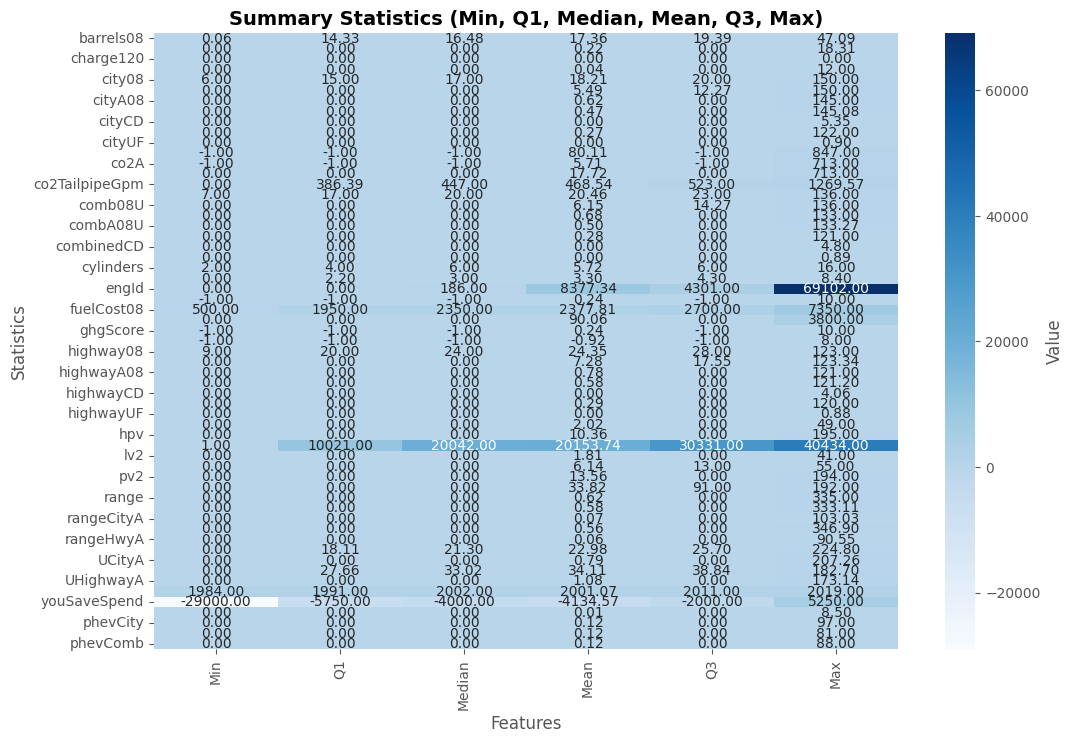

In [99]:
sdf.plot_summary()


## Dependent Variable:

/Users/alkhalifas/Documents/Github/cs6140-machine-learning/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 94.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alkhalifas/Documents/Github/cs6140-machine-learning/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 93.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alkhalifas/Documents/Github/cs6140-machine-learning/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alkhalifas/Documents/Github/cs6140-machine-learning/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 91.3% of the points cannot be placed; y

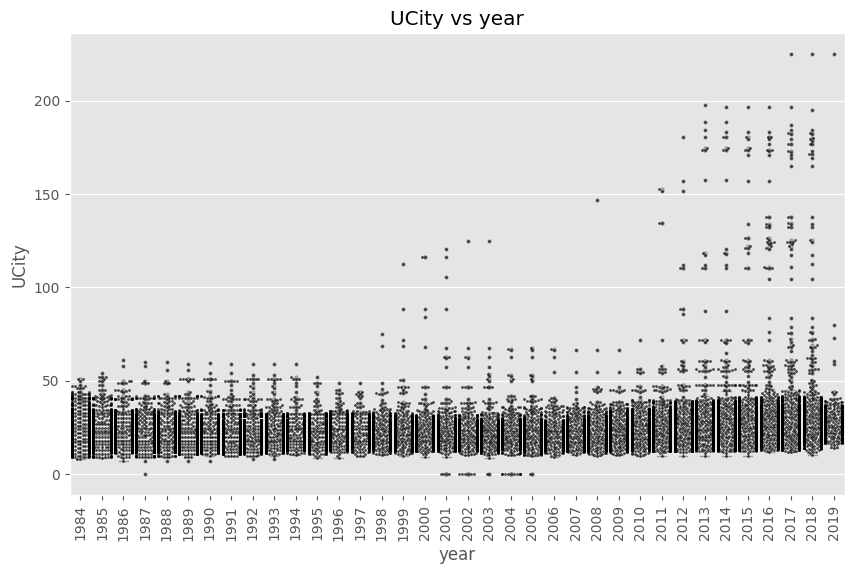

In [100]:
sdf.plot_boxplot_with_swarm(x_col='year', y_col='UCity')

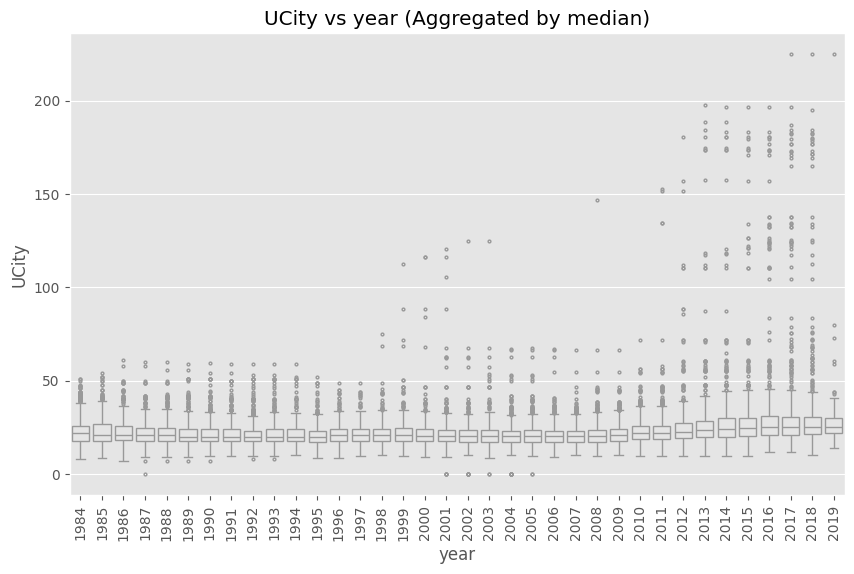

In [101]:
sdf.plot_scatter_with_boxplot_aggregated(x_col='year', y_col='UCity')

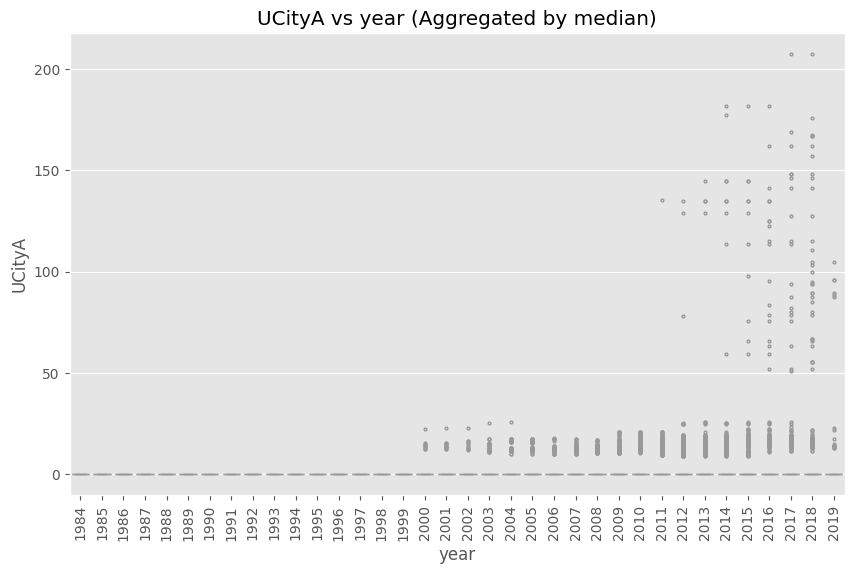

In [102]:
sdf.plot_scatter_with_boxplot_aggregated(x_col='year', y_col='UCityA')

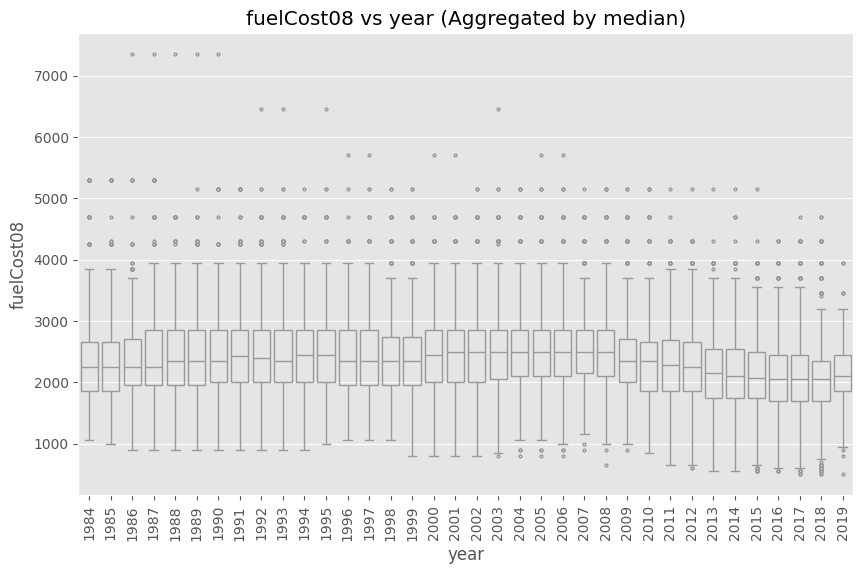

In [103]:
sdf.plot_scatter_with_boxplot_aggregated(x_col='year', y_col='fuelCost08')


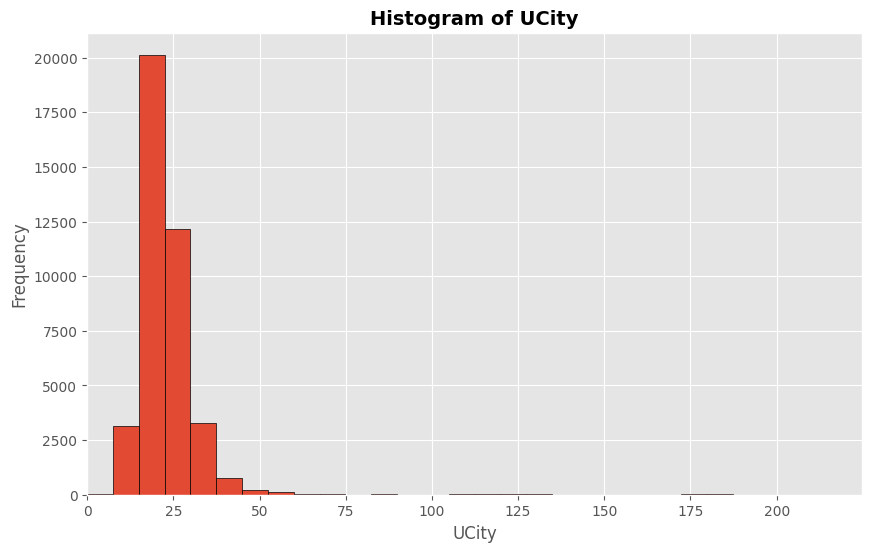

In [108]:
sdf.plot_histogram(column='UCity', bins=30)


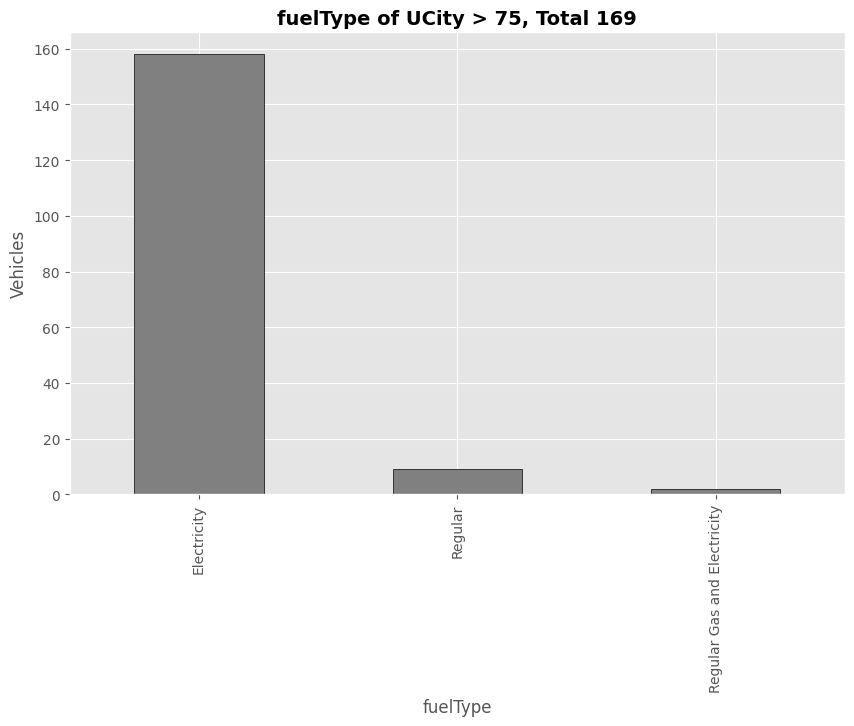

In [110]:
sdf.plot_fuelType_distribution(y_col='UCity', filter_value=75)


In [113]:
zero_UCity_vehicles = sdf.get_zero_UCity_vehicles()


25 zero UCity vehicles:

            make                              model                 fuelType       atvType
8127        Ford           F150 Dual-fuel 2WD (CNG)  Gasoline or natural gas  Bifuel (CNG)
8128        Ford           F150 Dual-fuel 4WD (CNG)  Gasoline or natural gas  Bifuel (CNG)
8129        Ford           F150 Dual-fuel 2WD (LPG)      Gasoline or propane  Bifuel (LPG)
8130        Ford           F150 Dual-fuel 4WD (LPG)      Gasoline or propane  Bifuel (LPG)
9174       Dodge               Ram Van 2500 2WD CNG                      CNG           CNG
9175       Dodge             Ram Wagon 2500 2WD CNG                      CNG           CNG
9183        Ford           F150 Dual-fuel 2WD (CNG)  Gasoline or natural gas  Bifuel (CNG)
9184        Ford           F150 Dual-fuel 4WD (CNG)  Gasoline or natural gas  Bifuel (CNG)
9185        Ford           F150 Dual-fuel 2WD (LPG)      Gasoline or propane  Bifuel (LPG)
9186        Ford           F150 Dual-fuel 4WD (LPG)      Gasolin

## Independent Variables:

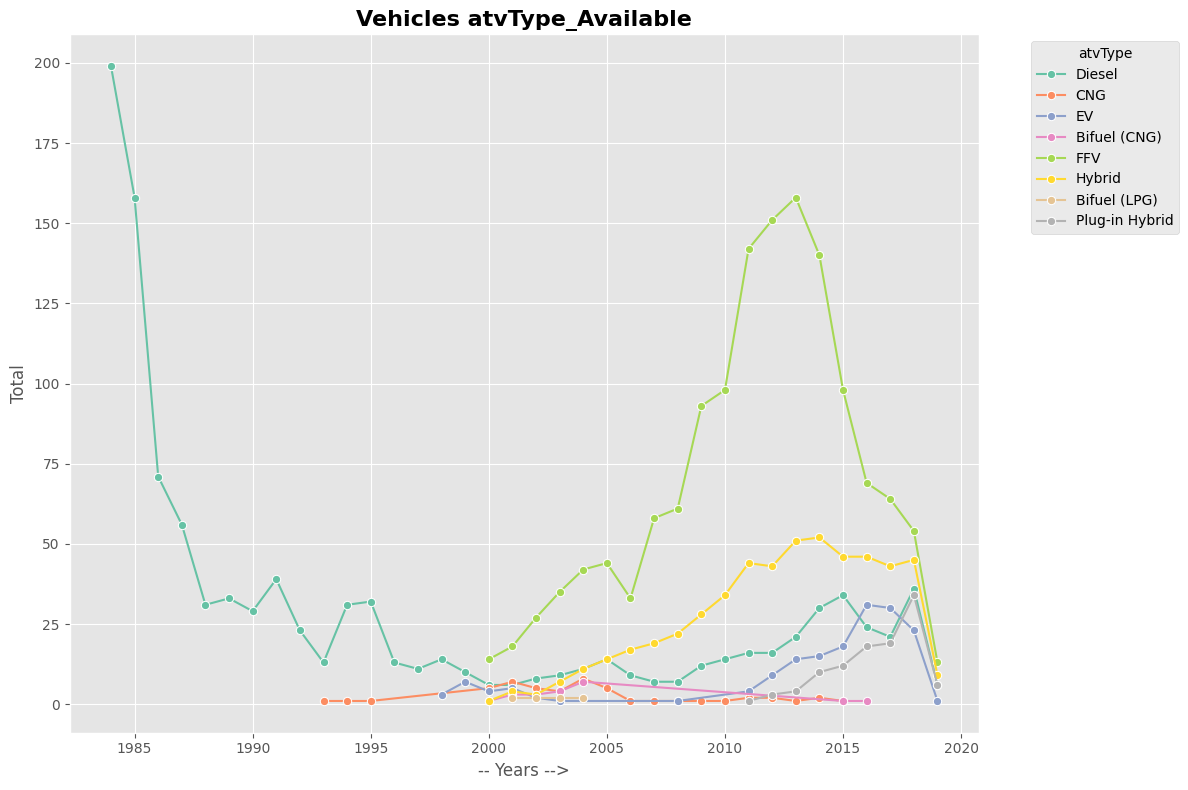

In [118]:
sdf.plot_atvType_over_years()


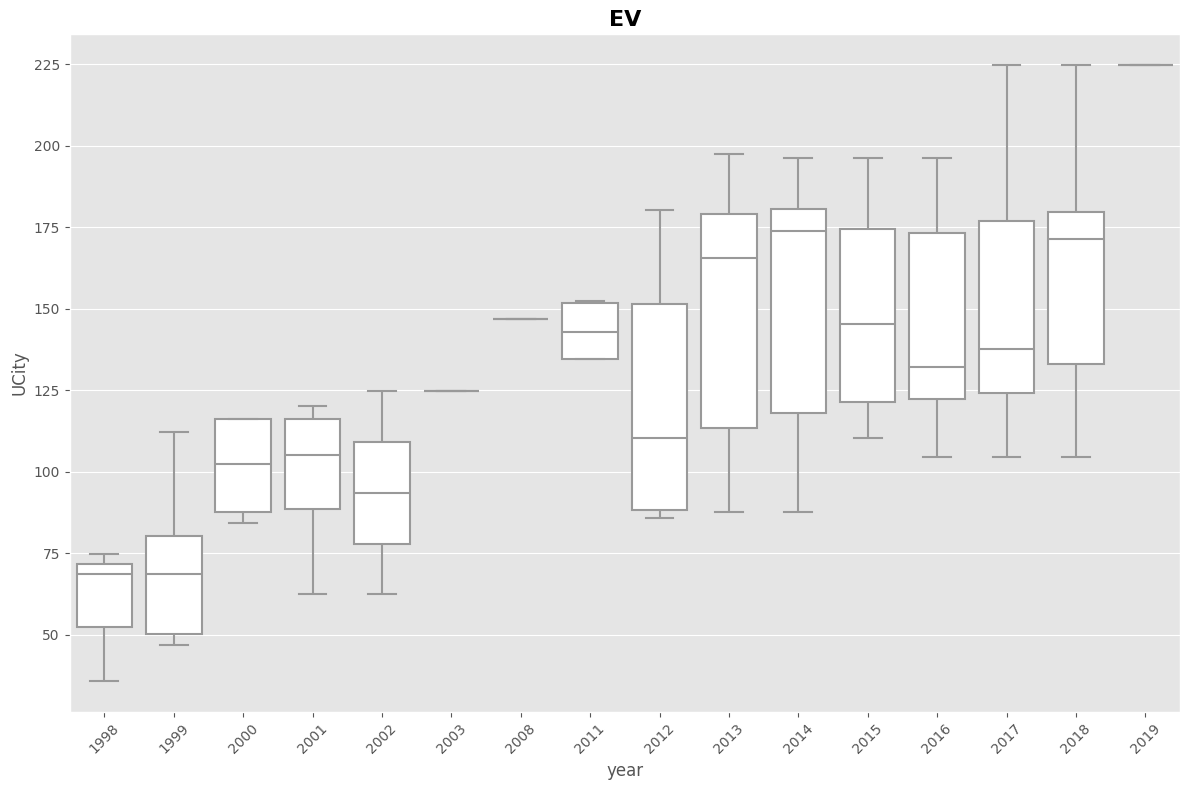

In [124]:
sdf.plot_ucity_over_years_by_atvType('EV')

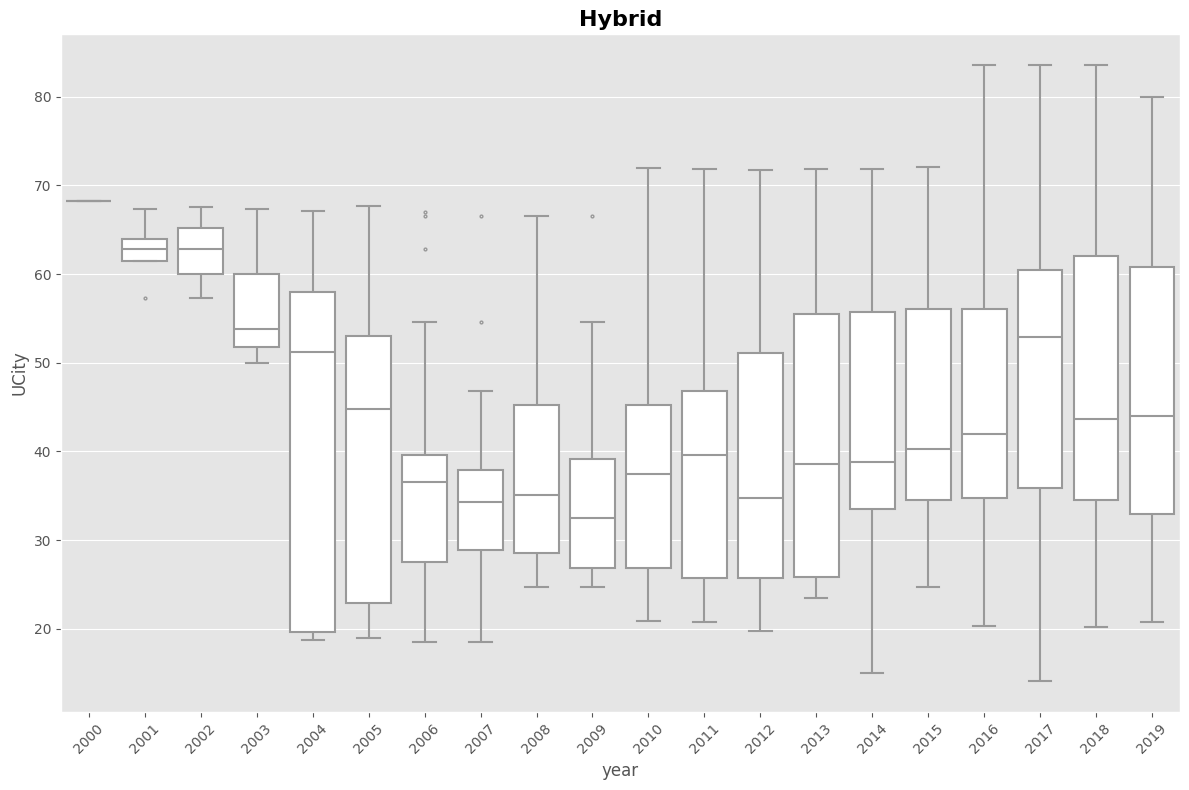

In [125]:
sdf.plot_ucity_over_years_by_atvType('Hybrid')


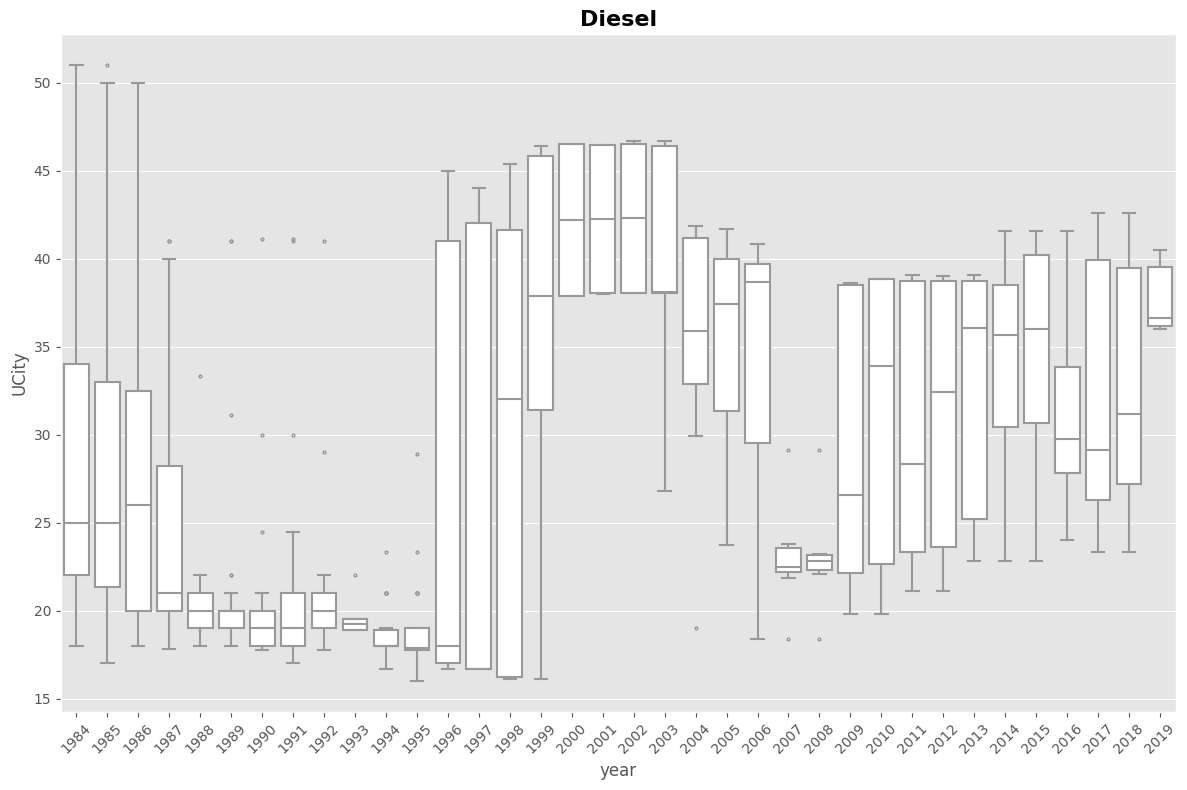

In [126]:
sdf.plot_ucity_over_years_by_atvType('Diesel')


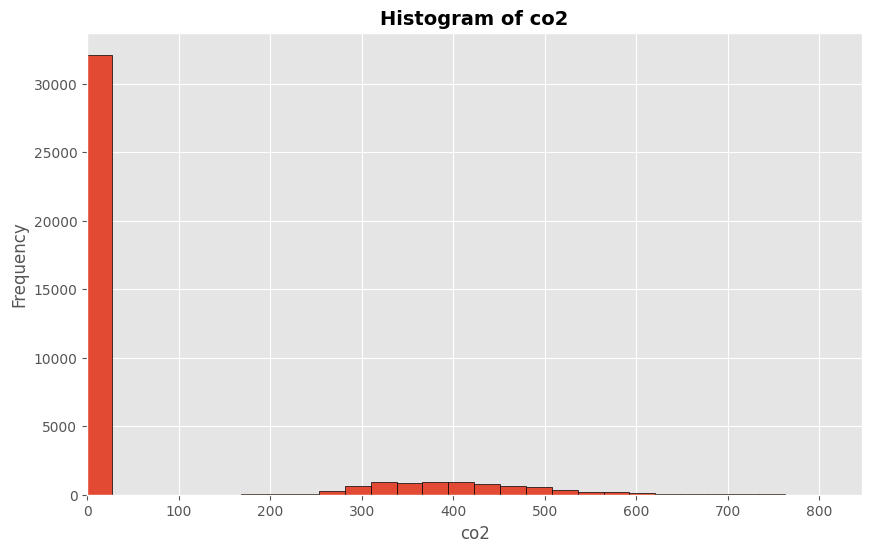

In [114]:
sdf.plot_histogram(column='co2', bins=30)

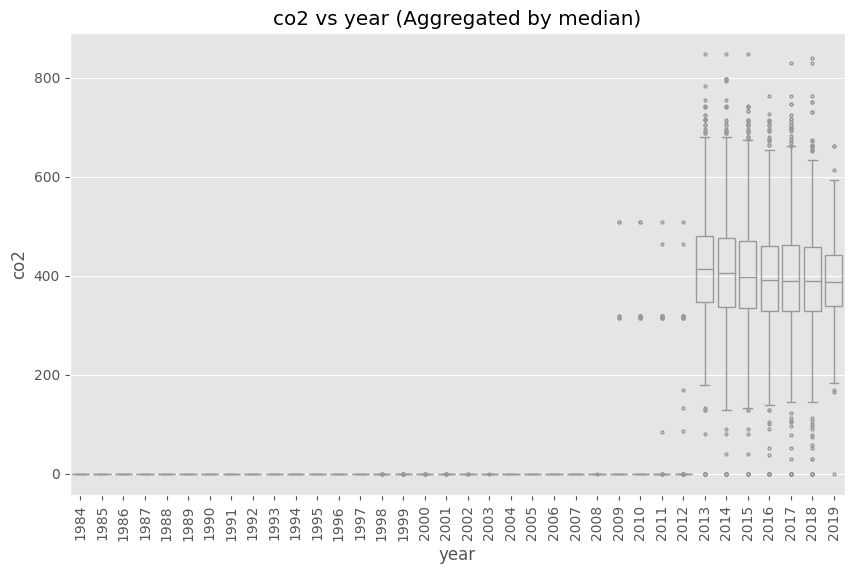

In [115]:
sdf.plot_scatter_with_boxplot_aggregated(x_col='year', y_col='co2')


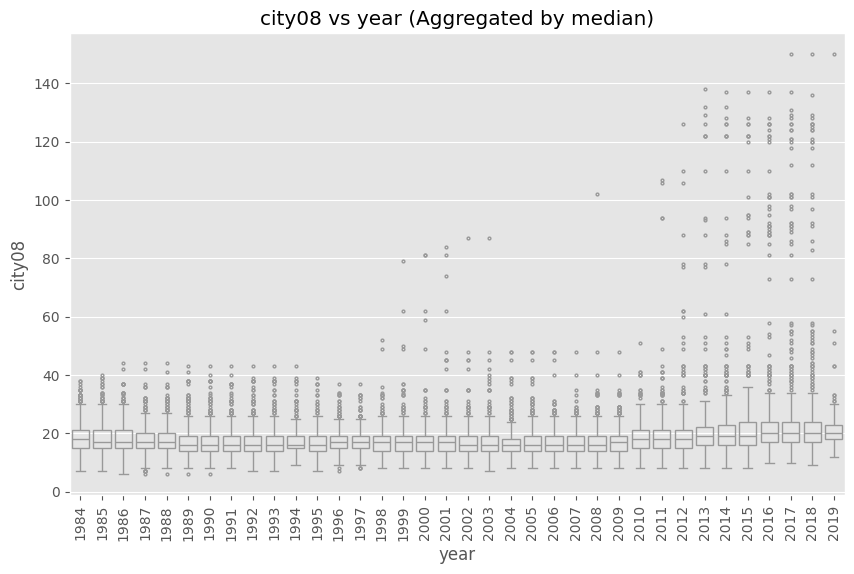

In [105]:
sdf.plot_scatter_with_boxplot_aggregated(x_col='year', y_col='city08')


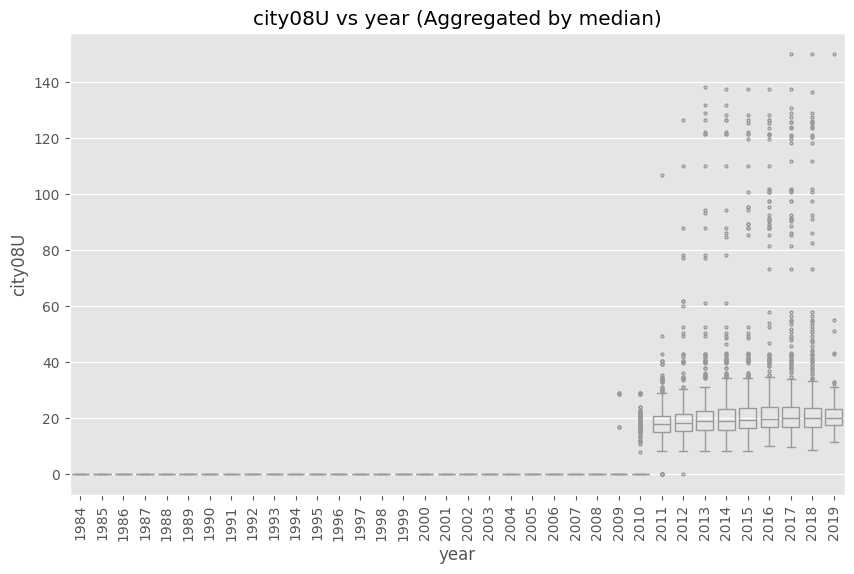

In [106]:
sdf.plot_scatter_with_boxplot_aggregated(x_col='year', y_col='city08U')


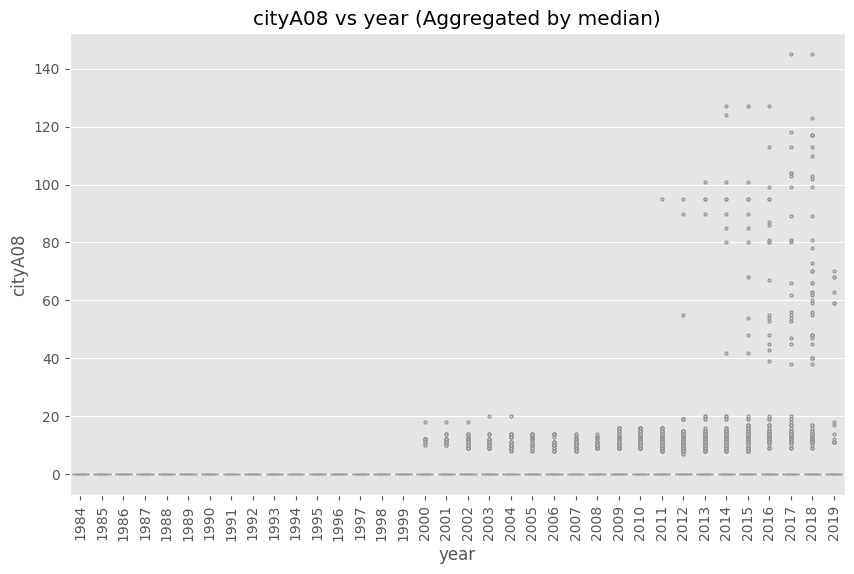

In [107]:
sdf.plot_scatter_with_boxplot_aggregated(x_col='year', y_col='cityA08')


In [37]:
# Get some descriptive statistics about the data
df.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,40081.000000,40081.000000,40081.0,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,...,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000,40081.000000
mean,17.363564,0.220069,0.0,0.036086,18.213318,5.494777,0.616077,0.466164,0.000471,0.274113,...,22.981798,0.789437,34.105932,1.076877,2001.068586,-4134.565006,0.007497,0.122851,0.123375,0.122527
std,4.597119,1.143270,0.0,0.534894,7.397433,11.027993,4.739349,4.563736,0.039282,3.513989,...,10.473444,6.612445,10.790921,7.205627,10.908967,3256.499139,0.195365,2.599224,2.510273,2.542274
min,0.060000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-29000.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.110500,0.000000,27.661300,0.000000,1991.000000,-5750.000000,0.000000,0.000000,0.000000,0.000000
50%,16.480500,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.296500,0.000000,33.024600,0.000000,2002.000000,-4000.000000,0.000000,0.000000,0.000000,0.000000
75%,19.388824,0.000000,0.0,0.000000,20.000000,12.273600,0.000000,0.000000,0.000000,0.000000,...,25.700000,0.000000,38.839200,0.000000,2011.000000,-2000.000000,0.000000,0.000000,0.000000,0.000000
max,47.087143,18.311667,0.0,12.000000,150.000000,150.000000,145.000000,145.083500,5.350000,122.000000,...,224.800000,207.262200,182.700000,173.143600,2019.000000,5250.000000,8.500000,97.000000,81.000000,88.000000


In [27]:
# Understand the null values
df.isnull().sum()

barrels08         0
barrelsA08        0
charge120         0
charge240         0
city08            0
              ...  
modifiedOn        0
startStop     31704
phevCity          0
phevHwy           0
phevComb          0
Length: 83, dtype: int64

In [28]:

df['fuelType'].value_counts()

fuelType
Regular                        25997
Premium                        11067
Gasoline or E85                 1287
Diesel                          1142
Electricity                      168
Premium or E85                   125
Midgrade                         100
CNG                               60
Premium and Electricity           47
Regular Gas and Electricity       29
Premium Gas or Electricity        28
Gasoline or natural gas           20
Gasoline or propane                8
Regular Gas or Electricity         3
Name: count, dtype: int64

In [29]:
df['fuelType1'].value_counts()


fuelType1
Regular Gasoline     27344
Premium Gasoline     11267
Diesel                1142
Electricity            168
Midgrade Gasoline      100
Natural Gas             60
Name: count, dtype: int64